# Wind Energy Prediction and Analysis

## Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

### Reading the dataset

In [2]:
data = pd.read_csv("../input/wind-turbine-scada-dataset/T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Data Wrangling

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [5]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

## Visualization

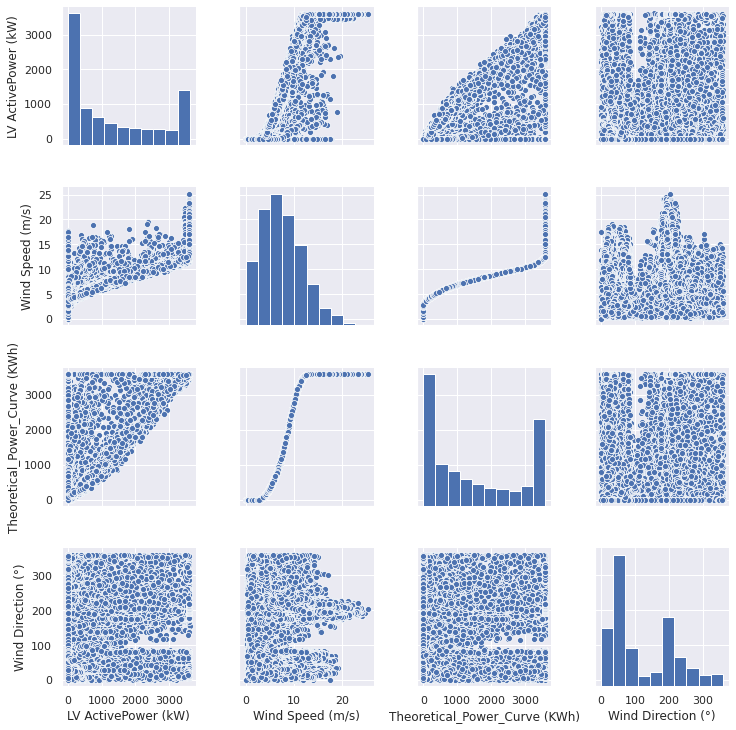

In [6]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

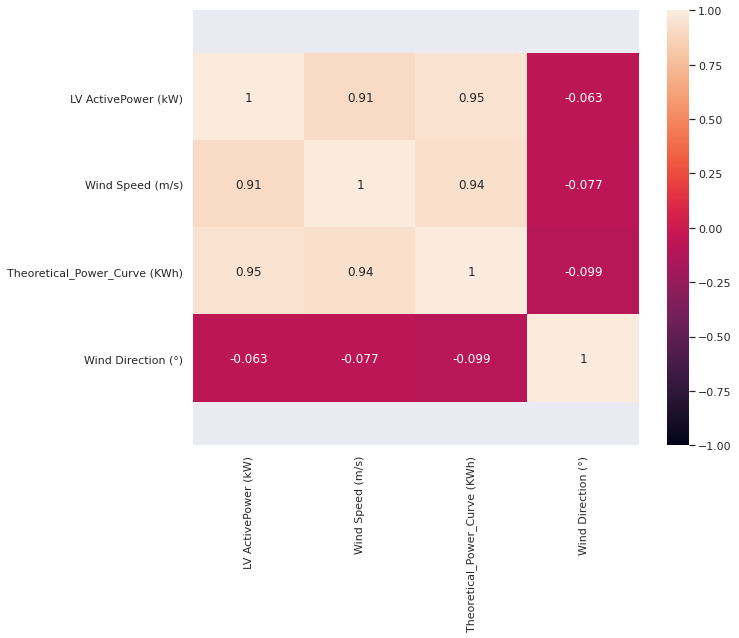

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [7]:
#correlation between the values
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [8]:
# Importing a visualization library
! pip install windrose

### Pie Bar Chart (Wind Direction VS Wind Speed)

/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  retu

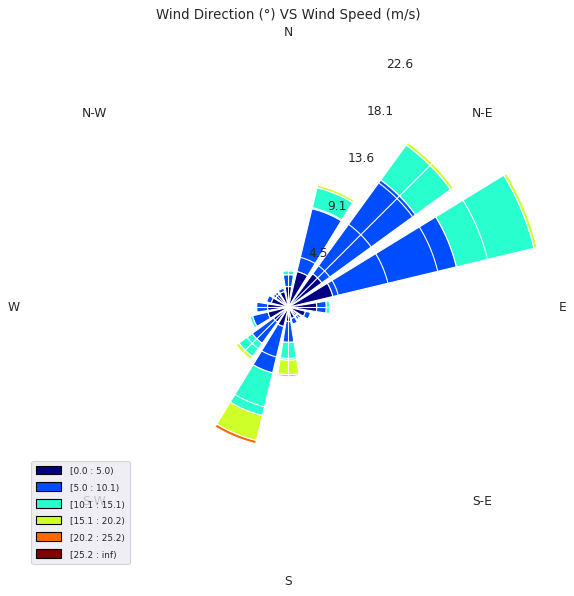

In [9]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [10]:
# Spliting the date time in year, month, days, hours and minutes
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


### KDE Plot

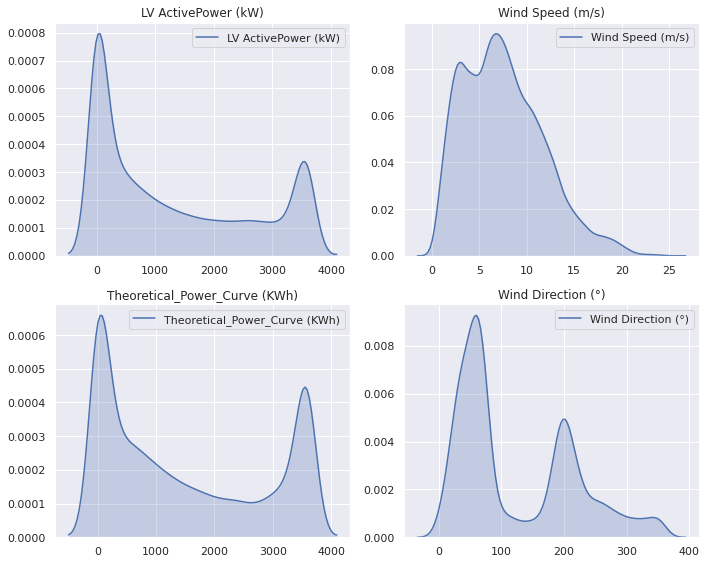

In [11]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [12]:
# droping all the null values from the data
data = data.dropna()

## Converting the Data/Time feature in proper DateTime format

In [13]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


### Line Graph of DateTime VS Target variable

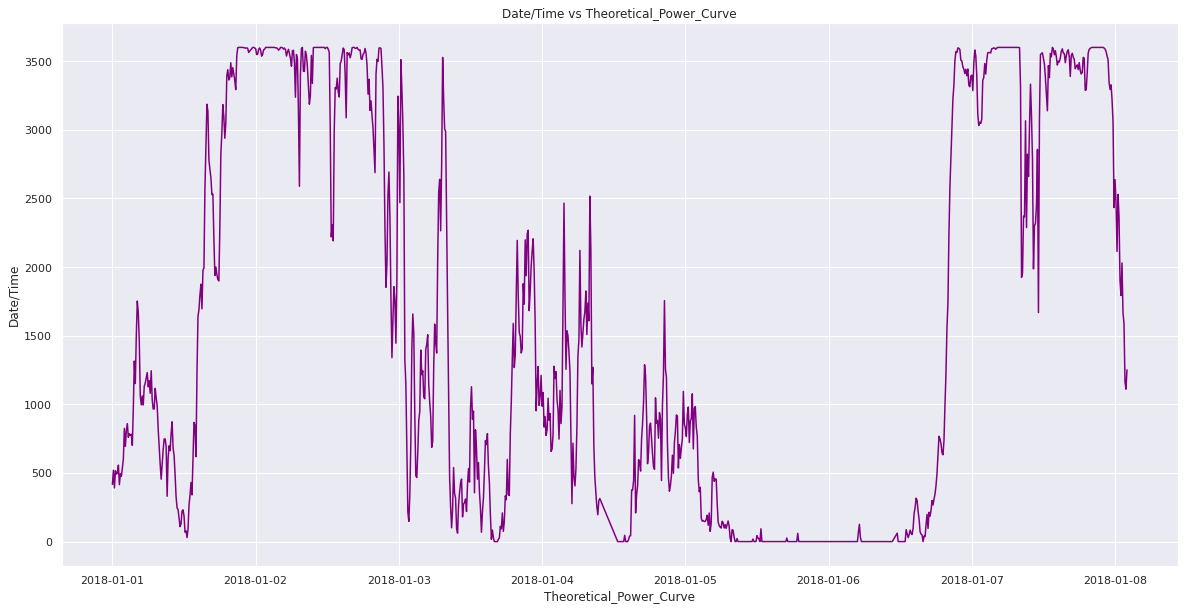

In [14]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [15]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [16]:
df = data.copy()

# Building the LSTM model

In [17]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
Using TensorFlow backend.


In [18]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [19]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [20]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [21]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [22]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [23]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [24]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [25]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [26]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [27]:
'''Drop all the features as we will not be having any in production'''
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [28]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [29]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [30]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [31]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [32]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [33]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

49519/49519 [==============================] - 87s 2ms/step - loss: 0.0055


In [34]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=3606.497436, Expected=3600.000000
Hour=2, Predicted=3605.969335, Expected=3600.000000
Hour=3, Predicted=3606.455371, Expected=3600.000000
Hour=4, Predicted=3606.975657, Expected=2506.112948
Hour=5, Predicted=2513.597927, Expected=1954.282949
Hour=6, Predicted=1962.053445, Expected=1128.684225
Hour=7, Predicted=1136.359783, Expected=2087.002742
Hour=8, Predicted=2094.725229, Expected=1497.144149
Hour=9, Predicted=1504.673131, Expected=3143.880909
Hour=10, Predicted=3151.348443, Expected=3257.240200
Hour=11, Predicted=3264.649850, Expected=3099.589351
Hour=12, Predicted=3106.886688, Expected=2288.732261
Hour=13, Predicted=2295.899442, Expected=2851.196746
Hour=14, Predicted=2858.320062, Expected=2285.016857
Hour=15, Predicted=2292.190221, Expected=1861.757477
Hour=16, Predicted=1868.721107, Expected=2366.628323
Hour=17, Predicted=2373.518363, Expected=1708.423896
Hour=18, Predicted=1715.222576, Expected=2470.838153
Hour=19, Predicted=2477.475197, Expected=1945.646150
Ho

Hour=161, Predicted=1813.476727, Expected=3128.215862
Hour=162, Predicted=3134.523500, Expected=2663.481637
Hour=163, Predicted=2669.789274, Expected=3013.534684
Hour=164, Predicted=3019.842324, Expected=2699.478367
Hour=165, Predicted=2705.786006, Expected=2512.232043
Hour=166, Predicted=2518.539684, Expected=2132.398669
Hour=167, Predicted=2138.706312, Expected=1498.471175
Hour=168, Predicted=1504.778812, Expected=2072.762765
Hour=169, Predicted=2079.070403, Expected=1555.808022
Hour=170, Predicted=1562.115662, Expected=2304.673182
Hour=171, Predicted=2310.980823, Expected=2914.007032
Hour=172, Predicted=2920.314675, Expected=1802.451426
Hour=173, Predicted=1808.759067, Expected=1521.620131
Hour=174, Predicted=1527.927772, Expected=1906.725720
Hour=175, Predicted=1913.033358, Expected=1160.393592
Hour=176, Predicted=1166.701229, Expected=741.645357
Hour=177, Predicted=747.952996, Expected=597.039504
Hour=178, Predicted=603.347147, Expected=1052.286480
Hour=179, Predicted=1058.594120,

Hour=329, Predicted=6.307642, Expected=0.000000
Hour=330, Predicted=6.307640, Expected=0.000000
Hour=331, Predicted=6.307639, Expected=0.000000
Hour=332, Predicted=6.307638, Expected=0.000000
Hour=333, Predicted=6.307638, Expected=39.921123
Hour=334, Predicted=46.228764, Expected=23.053693
Hour=335, Predicted=29.361335, Expected=0.000000
Hour=336, Predicted=6.307640, Expected=0.000000
Hour=337, Predicted=6.307639, Expected=0.000000
Hour=338, Predicted=6.307640, Expected=0.000000
Hour=339, Predicted=6.307640, Expected=19.084863
Hour=340, Predicted=25.392504, Expected=22.032280
Hour=341, Predicted=28.339923, Expected=21.340310
Hour=342, Predicted=27.647949, Expected=55.011625
Hour=343, Predicted=61.319265, Expected=34.587951
Hour=344, Predicted=40.895589, Expected=0.000000
Hour=345, Predicted=6.307639, Expected=121.154071
Hour=346, Predicted=127.461713, Expected=23.266966
Hour=347, Predicted=29.574608, Expected=0.000000
Hour=348, Predicted=6.307639, Expected=70.907908
Hour=349, Predicted

Hour=499, Predicted=6.307637, Expected=0.000000
Hour=500, Predicted=6.307639, Expected=0.000000
Hour=501, Predicted=6.307643, Expected=0.000000
Hour=502, Predicted=6.307642, Expected=0.000000
Hour=503, Predicted=6.307639, Expected=0.000000
Hour=504, Predicted=6.307641, Expected=0.000000
Hour=505, Predicted=6.307641, Expected=0.000000
Hour=506, Predicted=6.307640, Expected=0.000000
Hour=507, Predicted=6.307640, Expected=0.000000
Hour=508, Predicted=6.307637, Expected=0.000000
Hour=509, Predicted=6.307639, Expected=0.000000
Hour=510, Predicted=6.307642, Expected=0.000000
Hour=511, Predicted=6.307640, Expected=0.000000
Hour=512, Predicted=6.307638, Expected=0.000000
Hour=513, Predicted=6.307639, Expected=0.000000
Hour=514, Predicted=6.307639, Expected=0.000000
Hour=515, Predicted=6.307639, Expected=0.000000
Hour=516, Predicted=6.307643, Expected=0.000000
Hour=517, Predicted=6.307639, Expected=0.000000
Hour=518, Predicted=6.307640, Expected=0.000000
Hour=519, Predicted=6.307641, Expected=0

Hour=659, Predicted=1341.152552, Expected=960.705481
Hour=660, Predicted=967.013122, Expected=829.427996
Hour=661, Predicted=835.735639, Expected=664.793880
Hour=662, Predicted=671.101522, Expected=485.949172
Hour=663, Predicted=492.256811, Expected=304.877781
Hour=664, Predicted=311.185420, Expected=252.603050
Hour=665, Predicted=258.910690, Expected=192.950995
Hour=666, Predicted=199.258635, Expected=272.888864
Hour=667, Predicted=279.196506, Expected=194.028538
Hour=668, Predicted=200.336177, Expected=201.020308
Hour=669, Predicted=207.327948, Expected=138.589851
Hour=670, Predicted=144.897491, Expected=223.727403
Hour=671, Predicted=230.035042, Expected=169.414276
Hour=672, Predicted=175.721916, Expected=150.674347
Hour=673, Predicted=156.981986, Expected=171.265153
Hour=674, Predicted=177.572793, Expected=50.379992
Hour=675, Predicted=56.687633, Expected=22.235087
Hour=676, Predicted=28.542730, Expected=18.483618
Hour=677, Predicted=24.791257, Expected=25.923293
Hour=678, Predicte

Hour=829, Predicted=39.704098, Expected=144.464714
Hour=830, Predicted=150.772354, Expected=64.254790
Hour=831, Predicted=70.562431, Expected=0.000000
Hour=832, Predicted=6.307641, Expected=0.000000
Hour=833, Predicted=6.307641, Expected=0.000000
Hour=834, Predicted=6.307643, Expected=0.000000
Hour=835, Predicted=6.307638, Expected=0.000000
Hour=836, Predicted=6.307638, Expected=0.000000
Hour=837, Predicted=6.307639, Expected=0.000000
Hour=838, Predicted=6.307639, Expected=0.000000
Hour=839, Predicted=6.307640, Expected=0.000000
Hour=840, Predicted=6.307639, Expected=0.000000
Hour=841, Predicted=6.307641, Expected=0.000000
Hour=842, Predicted=6.307639, Expected=0.000000
Hour=843, Predicted=6.307643, Expected=0.000000
Hour=844, Predicted=6.307639, Expected=0.000000
Hour=845, Predicted=6.307639, Expected=0.000000
Hour=846, Predicted=6.307642, Expected=0.000000
Hour=847, Predicted=6.307640, Expected=0.000000
Hour=848, Predicted=6.307640, Expected=0.000000
Hour=849, Predicted=6.307637, Exp

Hour=997, Predicted=1817.570898, Expected=1787.100338
Hour=998, Predicted=1793.407977, Expected=2777.504103
Hour=999, Predicted=2783.811742, Expected=3025.199012
Hour=1000, Predicted=3031.506651, Expected=3161.693967


In [ ]:
lstm_model.summary()

## Calculating Mean Absolute Error

In [35]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.4614952886022825


# Final Prediction Plot

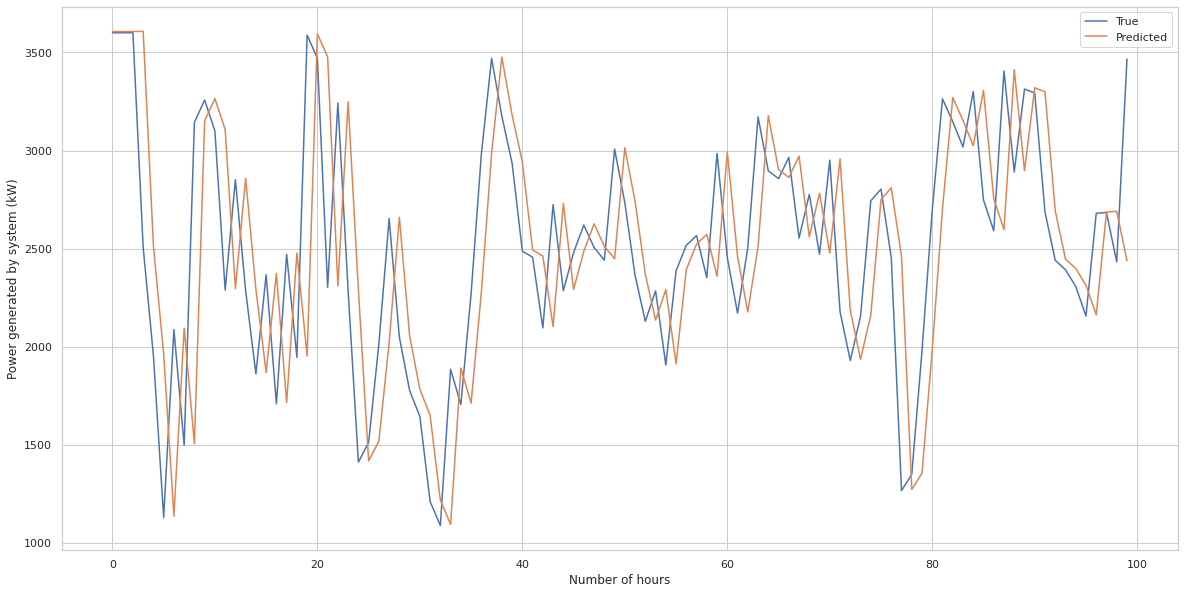

In [38]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()